# Load Bitcoin historical price data

In [132]:
import numpy as np
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

temp = '/Users/kochiai/Desktop/machine_learning/%s.csv'
path = temp % 'bitstampUSD_1-min_data_2012-01-01_to_2017-10-20'
!wc -l $path
bitcoin_prices = pd.read_csv(temp % 'bitstampUSD_1-min_data_2012-01-01_to_2017-10-20')
print(bitcoin_prices.head())
%time _ = pd.read_csv(path)

 3045858 /Users/kochiai/Desktop/machine_learning/bitstampUSD_1-min_data_2012-01-01_to_2017-10-20.csv
    Timestamp  Open  High   Low  Close  Volume_(BTC)  Volume_(Currency)  \
0  1325317920  4.39  4.39  4.39   4.39      0.455581                2.0   
1  1325317980  4.39  4.39  4.39   4.39      0.455581                2.0   
2  1325318040  4.39  4.39  4.39   4.39      0.455581                2.0   
3  1325318100  4.39  4.39  4.39   4.39      0.455581                2.0   
4  1325318160  4.39  4.39  4.39   4.39      0.455581                2.0   

   Weighted_Price  
0            4.39  
1            4.39  
2            4.39  
3            4.39  
4            4.39  
CPU times: user 3.53 s, sys: 286 ms, total: 3.81 s
Wall time: 3.81 s


In [133]:
bitcoin_prices.index = pd.to_datetime(bitcoin_prices.pop('Timestamp'), unit='s', origin='unix')

In [134]:
bitcoin_prices.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:53:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:54:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:55:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:56:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39


In [135]:
bitcoin_prices.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2017-10-19 23:56:00,5690.88,5690.88,5690.88,5690.88,0.168941,961.421706,5690.880000
2017-10-19 23:57:00,5698.13,5704.10,5695.63,5704.10,2.311662,13174.852877,5699.300163
2017-10-19 23:58:00,5695.62,5695.64,5694.00,5695.64,0.129647,738.409647,5695.533637
2017-10-19 23:59:00,5700.39,5700.39,5698.69,5698.69,0.085426,486.929798,5700.004031
2017-10-20 00:00:00,5700.00,5700.00,5698.68,5700.00,0.116847,665.913860,5699.046463


In [136]:
bitcoin_prices.loc[bitcoin_prices['Open'].idxmax()]

Open                   5846.430000
High                   5846.430000
Low                    5839.640000
Close                  5842.140000
Volume_(BTC)             33.284439
Volume_(Currency)    194572.589890
Weighted_Price         5845.752399
Name: 2017-10-13 02:44:00, dtype: float64

In [137]:
bitcoin_prices.loc[bitcoin_prices['Open'].idxmin()]

Open                 3.800
High                 3.800
Low                  3.800
Close                3.800
Volume_(BTC)         0.270
Volume_(Currency)    1.026
Weighted_Price       3.800
Name: 2012-01-27 01:58:00, dtype: float64

# Pre-processing data
We first remove NaN or NaT values from the data.

In [138]:
# Removing NaN's
bitcoin_prices.replace(["NaN", 'NaT'], np.nan, inplace = True)
bitcoin_prices = bitcoin_prices.dropna()
print(bitcoin_prices.count())

Open                 3045857
High                 3045857
Low                  3045857
Close                3045857
Volume_(BTC)         3045857
Volume_(Currency)    3045857
Weighted_Price       3045857
dtype: int64


In [139]:
bitcoin_prices.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)',
       'Weighted_Price'],
      dtype='object')

In [140]:
# Get daily closing values. Pick last minute of the day as the closing price of the day.
last_min_daily = bitcoin_prices.groupby(pd.TimeGrouper('H')).last()
last_closing_values = last_min_daily.Close
print(last_closing_values)

Timestamp
2011-12-31 07:00:00       4.39
2011-12-31 08:00:00       4.39
2011-12-31 09:00:00       4.39
2011-12-31 10:00:00       4.39
2011-12-31 11:00:00       4.39
2011-12-31 12:00:00       4.39
2011-12-31 13:00:00       4.39
2011-12-31 14:00:00       4.39
2011-12-31 15:00:00       4.39
2011-12-31 16:00:00       4.57
2011-12-31 17:00:00       4.58
2011-12-31 18:00:00       4.58
2011-12-31 19:00:00       4.58
2011-12-31 20:00:00       4.58
2011-12-31 21:00:00       4.58
2011-12-31 22:00:00       4.58
2011-12-31 23:00:00       4.58
2012-01-01 00:00:00       4.58
2012-01-01 01:00:00       4.58
2012-01-01 02:00:00       4.58
2012-01-01 03:00:00       4.58
2012-01-01 04:00:00       4.58
2012-01-01 05:00:00       4.58
2012-01-01 06:00:00       4.58
2012-01-01 07:00:00       4.58
2012-01-01 08:00:00       4.58
2012-01-01 09:00:00       4.58
2012-01-01 10:00:00       4.58
2012-01-01 11:00:00       4.58
2012-01-01 12:00:00       4.58
                        ...   
2017-10-18 19:00:00    5390.6

# Plotting

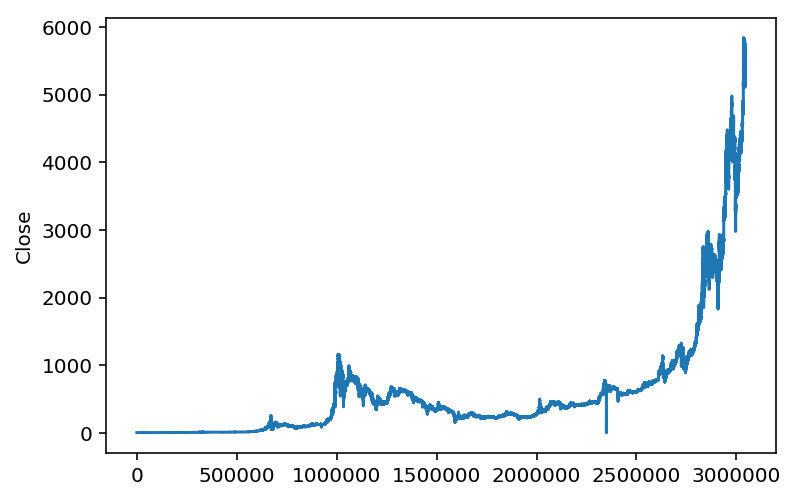

In [141]:
# Plot closing price of all available data (every one minutes)
plotValue = bitcoin_prices.Close.values
plt.plot(plotValue)
plt.ylabel('Close')
plt.show()

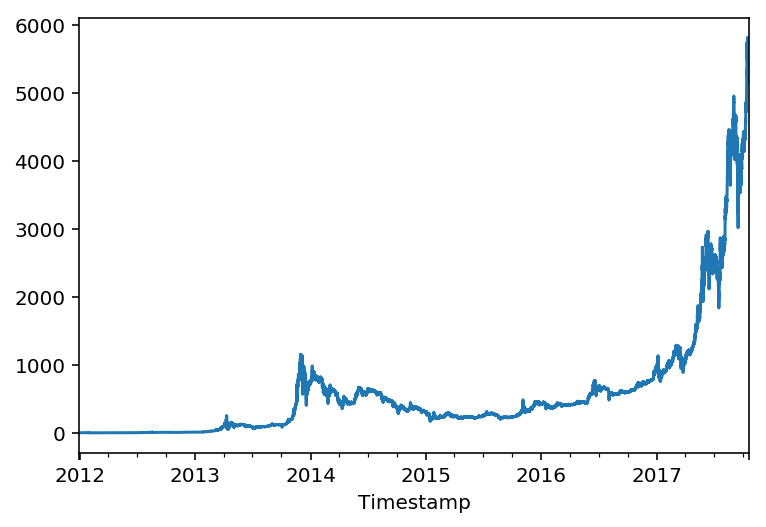

In [142]:
# Plot daily closing prices
last_closing_values.plot()

# Training
Train bitcoin prices using RNN with Basic LSTM cells. The model takes a closing price of the last day and predict closing price of next day.

In [143]:
import tensorflow as tf
from tensorflow.contrib import rnn
import time

In [144]:
def splitData(arr, validation_set_ratio = 0.2):
    '''Split data into test set and validation set.
       
       Arguments
       ---------
       arr: Array you want to split
       validation_set_ratio: ratio of validation set. training set ratio will be 1 - validation_set_ratio.
    '''
    # get count of arr
    row_count = arr.shape[0]
    print(int(row_count * (1 - validation_set_ratio)))
    training_set_ratio = 1 - validation_set_ratio
    training_set_count = int(row_count * training_set_ratio)
    training_set = arr[:training_set_count]
    validation_set = arr[training_set_count:]
    
    return training_set, validation_set

## Making training Mini-batches


In [145]:
def get_batches(arr, n_seqs, n_steps):
    '''Create a generator that returns batches of size
       n_seqs x n_steps from arr.
       
       Arguments
       ---------
       arr: Array you want to make batches from
       n_seqs: Batch size, the number of sequences per batch
       n_steps: Number of sequence steps per batch
    '''
    # Get the number of characters per batch and number of batches we can make
    num_per_batch = n_seqs * n_steps
    n_batches = len(arr)//num_per_batch
    
    # Keep only enough characters to make full batches
    arr = arr[:n_batches * num_per_batch]
    
    # Reshape into n_seqs rows
    arr = arr.reshape((n_seqs, -1))
    
    for n in range(0, arr.shape[1], n_steps):
        # The features
        x = arr[:, n:n+n_steps]
        # The targets, shifted by one
        y = np.zeros_like(x)
        y[:, :-1], y[:, -1] = x[:, 1:], x[:, 0]
        yield x, y

## Input and label pre-processing

We want to pre-process input and output, so that our model predict next step of return.
Here we calcurate log of return. 

In [146]:
df = last_min_daily
df['ret'] = df.Close.pct_change()
df['log_ret'] = np.log(df.Close) - np.log(df.Close.shift(1))
df = df.dropna()
#print(df.log_ret)
print(df.ret)

Timestamp
2011-12-31 08:00:00    0.000000
2011-12-31 09:00:00    0.000000
2011-12-31 10:00:00    0.000000
2011-12-31 11:00:00    0.000000
2011-12-31 12:00:00    0.000000
2011-12-31 13:00:00    0.000000
2011-12-31 14:00:00    0.000000
2011-12-31 15:00:00    0.000000
2011-12-31 16:00:00    0.041002
2011-12-31 17:00:00    0.002188
2011-12-31 18:00:00    0.000000
2011-12-31 19:00:00    0.000000
2011-12-31 20:00:00    0.000000
2011-12-31 21:00:00    0.000000
2011-12-31 22:00:00    0.000000
2011-12-31 23:00:00    0.000000
2012-01-01 00:00:00    0.000000
2012-01-01 01:00:00    0.000000
2012-01-01 02:00:00    0.000000
2012-01-01 03:00:00    0.000000
2012-01-01 04:00:00    0.000000
2012-01-01 05:00:00    0.000000
2012-01-01 06:00:00    0.000000
2012-01-01 07:00:00    0.000000
2012-01-01 08:00:00    0.000000
2012-01-01 09:00:00    0.000000
2012-01-01 10:00:00    0.000000
2012-01-01 11:00:00    0.000000
2012-01-01 12:00:00    0.000000
2012-01-01 13:00:00    0.000000
                         ...  

## Build Neural Network 

In [147]:
def build_inputs(batch_size, num_steps):
    ''' Define placeholders for inputs, targets, and dropout 
    
        Arguments
        ---------
        batch_size: Batch size, number of sequences per batch
        num_steps: Number of sequence steps in a batch
        
    '''
    # Declare placeholders we'll feed into the graph
    with tf.name_scope('inputs'):
        inputs = tf.placeholder(tf.float32, [batch_size, num_steps], name='inputs')
    
    with tf.name_scope('targets'):
        targets = tf.placeholder(tf.float32, [batch_size, num_steps], name='targets')
    
    # Keep probability placeholder for drop out layers
    keep_prob = tf.placeholder(tf.float32, name='keep_prob')
    
    return inputs, targets, keep_prob

In [148]:
def build_lstm(lstm_size, num_layers, batch_size, keep_prob):
    ''' Build LSTM cell.
    
        Arguments
        ---------
        keep_prob: Scalar tensor (tf.placeholder) for the dropout keep probability
        lstm_size: Size of the hidden layers in the LSTM cells
        num_layers: Number of LSTM layers
        batch_size: Batch size

    '''
    ### Build the LSTM Cell
    with tf.name_scope('rnn_layers'):
        def build_cell(lstm_size, keep_prob):
            # Use a basic LSTM cell
            #lstm = tf.contrib.rnn.BasicLSTMCell(lstm_size)
        
            # Add dropout to the cell
           # drop = tf.contrib.rnn.DropoutWrapper(lstm, output_keep_prob=keep_prob)
            drop = rnn.DropoutWrapper(rnn.BasicLSTMCell(lstm_size, forget_bias=2, activation=tf.nn.tanh), output_keep_prob=keep_prob)

            return drop
    
        # Stack up multiple LSTM layers, for deep learning
        cell = tf.contrib.rnn.MultiRNNCell([build_cell(lstm_size, keep_prob) for _ in range(num_layers)])
    
    with tf.name_scope('rnn_init_state'):
        initial_state = cell.zero_state(batch_size, tf.float32)
    
    return cell, initial_state

In [182]:
def build_output(lstm_output, in_size, out_size=1):
    ''' Build a fully-connected layer, return the linear output and logits.
    
        Arguments
        ---------
        
        x: Input tensor
        in_size: Size of the input tensor, for example, size of the LSTM cells    
    '''
   # print('insize:{}'.format(in_size))
   # print('out_size:{}'.format(out_size))
   # print('lstm_output:{}'.format(lstm_output.get_shape()))

    # Reshape output so it's a bunch of rows, one row for each step for each sequence.
    # That is, the shape should be batch_size*num_steps rows by lstm_size columns
    seq_output = tf.concat(lstm_output, axis=1)
    #reshaping into batch_size * step_size X lstm_size
    x = tf.reshape(lstm_output, [-1, in_size])
    #print('x:{}'.format(x.get_shape()))

    # Since output is a bunch of rows of RNN cell outputs, logits will be a bunch
    # of rows of logit outputs, one for each step and sequence
    with tf.variable_scope('fully_connected'):
        fc_w = tf.Variable(tf.truncated_normal((in_size, out_size), stddev=0.1))
        #fc_b = tf.Variable(tf.zeros(out_size))
        fc_b = tf.Variable(tf.truncated_normal((1, fc_w.shape[1].value), stddev=0.1))
               
     # Since output is a bunch of rows of RNN cell outputs, logits will be a bunch
     # of rows of logit outputs, one for each step and sequence
        logits = tf.matmul(x, fc_w) + fc_b
        out = logits
        
    #print('out:{}'.format(lstm_output))

    return out, logits

In [183]:
def build_loss(logits, targets, lstm_size):
    ''' Calculate the loss from the logits and the targets.
    
        Arguments
        ---------
        logits: Logits from final fully connected layer
        targets: Targets for supervised learning
        lstm_size: Number of LSTM hidden units
        
    '''
    with tf.name_scope('Loss'):
        y_reshaped = tf.reshape(targets, logits.get_shape())
        #squared_deltas = tf.square(logits - y_reshaped)
         #loss = tf.reduce_sum(squared_deltas)
        regularizer = tf.contrib.layers.l2_regularizer(scale=0.0001)
        reguralization = tf.contrib.layers.apply_regularization(regularizer, tf.trainable_variables())
        loss =  tf.nn.l2_loss(tf.subtract(y_reshaped, logits)) + reguralization
        
        #tf.reduce_mean(squared_deltas)
        #loss = tf.losses.mean_squared_error(y_reshaped, logits)
        training_summary = tf.summary.scalar('training_loss', loss)
        validation_summary = tf.summary.scalar('validation_loss', loss)

    return loss, training_summary, validation_summary 

In [184]:
def build_optimizer(loss, learning_rate, grad_clip):
    ''' Build optmizer for training, using gradient clipping.
    
        Arguments:
        loss: Network loss
        learning_rate: Learning rate for optimizer
    
    '''
    
    # Optimizer for training, using gradient clipping to control exploding gradients
#     tvars = tf.trainable_variables()
#     grads, _ = tf.clip_by_global_norm(tf.gradients(loss, tvars), grad_clip)
#     train_op = tf.train.AdamOptimizer(learning_rate)
#     optimizer = train_op.apply_gradients(zip(grads, tvars))
    #optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    with tf.name_scope('Train'):
        optimizer = tf.train.AdamOptimizer(learning_rate)
        #optimizer = tf.train.RMSPropOptimizer(learning_rate)
        minimize = optimizer.minimize(loss)
        
    return minimize

In [185]:
def calcurate_pearson_correration(predictions, targets):
    with tf.name_scope('stats'):
        # Pearson correlation to evaluate the model
        targets = tf.reshape(targets, predictions.get_shape())
        covariance = tf.reduce_sum(tf.matmul(tf.transpose(tf.subtract(predictions, tf.reduce_mean(predictions))),tf.subtract(targets, tf.reduce_mean(targets))))
        var_pred = tf.reduce_sum(tf.square(tf.subtract(predictions, tf.reduce_mean(predictions))))
        var_y = tf.reduce_sum(tf.square(tf.subtract(targets, tf.reduce_mean(targets))))
        pearson_corr = covariance / tf.sqrt(var_pred * var_y) 

    correration_summary = tf.summary.scalar("pearson_corr", pearson_corr)
    return pearson_corr, correration_summary

In [186]:
class NumSequenceRNN:
    
    def __init__(self, batch_size=64, num_steps=50, 
                       lstm_size=128, num_layers=2, learning_rate=0.001, 
                       grad_clip=5, sampling=False):
    
        # When we're using this network for sampling later, we'll be passing in
        # one number at a time, so providing an option for that
        if sampling == True:
            batch_size, num_steps = 1, 1
        else:
            batch_size, num_steps = batch_size, num_steps

        tf.reset_default_graph()
        
        # Build the input placeholder tensors
        self.inputs, self.targets, self.keep_prob = build_inputs(batch_size, num_steps)

        # Build the LSTM cell
        cell, self.initial_state = build_lstm(lstm_size, num_layers, batch_size, self.keep_prob)

        ### Run the data through the RNN layers
        ipt = tf.reshape(self.inputs, [batch_size, num_steps, 1])
        
        # Run each sequence step through the RNN and collect the outputs
        self.outputs, state = tf.nn.dynamic_rnn(cell, ipt, initial_state=self.initial_state)
        self.final_state = state
        
        # Get predictions and logits
        self.prediction, self.logits = build_output(self.outputs, lstm_size)
        self.correration, self.correration_summary = calcurate_pearson_correration(self.prediction, self.targets)
        # Loss and optimizer (with gradient clipping)
        self.loss, self.training_summary, self.validation_summary = build_loss(self.logits, self.targets, lstm_size)
        #self.validationLoss, _ = build_loss(self.logits, self.targets, lstm_size, isTraining=False)
        self.optimizer = build_optimizer(self.loss, learning_rate, grad_clip)

In [187]:
batch_size = 100       # Sequences per batch
print(df.values.size)
num_steps = 24         # Number of sequence steps per batch
#lstm_size = 512         # Size of hidden layers in LSTMs
#num_layers = 2          # Number of LSTM layers
#learning_rate = 0.0015   # Learning rate
#keep_prob = 1       # Dropout keep probability

456885


In [188]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    global valid_features
    global valid_labels   
    cost_dict = {x: feature_batch, y: label_batch, keep_prob: 1}
    cost_value = session.run(cost, feed_dict=cost_dict)
    
    validation_feed_dict = {x: valid_features, y: valid_labels, keep_prob: 1}
    validation_accuracy = session.run(accuracy, feed_dict=validation_feed_dict)

    print('loss:{0}, validation accuracy:{1}'.format(cost_value, validation_accuracy))

In [189]:
#%pdb


In [190]:
training_set, validation_set = splitData(df.ret.values, validation_set_ratio=0.2)
print( 'num of trainig set {}'.format(training_set.shape[0]) )
print( 'num of validation set {}'.format(validation_set.shape[0]) )

40612
num of trainig set 40612
num of validation set 10153


In [246]:
# Save every N iterations
save_every_n = 100

def train(model, epochs, runID, keep_prob):
    saver = tf.train.Saver(max_to_keep=100)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer()) 
        file_writer = tf.summary.FileWriter('./logs/{}'.format(runID), graph=sess.graph)
        file_writer.add_graph(sess.graph)

        # Use the line below to load a checkpoint and resume training
        #saver.restore(sess, 'checkpoints/______.ckpt')
        counter = 0
        for e in range(epochs):
            # Train network
            new_state = sess.run(model.initial_state)
            for x, y in get_batches(training_set, batch_size, num_steps):
                counter += 1
                start = time.time()
                feed = {model.inputs: x,
                        model.targets: y,
                        model.keep_prob: keep_prob,
                        model.initial_state: new_state}
                training_summary, batch_loss, new_state, _ = sess.run([model.training_summary,
                                                              model.loss, 
                                                              model.final_state, 
                                                              model.optimizer], 
                                                              feed_dict=feed)
                end = time.time()
                #print(squared_deltas)
                print('RunID: {}...'.format(runID),
                      'Epoch: {}/{}... '.format(e+1, epochs),
                      'Training Step: {}... '.format(counter),
                      'Training loss: {:.4f}... '.format(batch_loss),
                      '{:.4f} sec/batch'.format((end-start)))
                
                file_writer.add_summary(training_summary)

                if (counter % save_every_n == 0):
                    saver.save(sess, "checkpoints/model_{}_{}.ckpt".format(counter, runID))

                # find loss using validation set
        
                # shaffle validation_set
                batches = get_batches(validation_set, batch_size, num_steps)
                vx, vy = next(batches)
                v_feed = {model.inputs: vx,
                        model.targets: vy,
                        model.keep_prob: 1.0}
                pearson, pearson_summary, validation_summary, validation_loss = sess.run([model.correration,
                                                                         model.correration_summary,
                                                                         model.validation_summary, 
                                                                         model.loss], 
                                                                         feed_dict = v_feed)
                print('validation_loss: {}'.format(validation_loss))
                print('pearson correration: {}'.format(pearson))

                file_writer.add_summary(validation_summary)
                file_writer.flush()
                file_writer.add_summary(pearson_summary)
                file_writer.flush()
        file_writer.close()
        saver.save(sess, "checkpoints/model_{}.ckpt".format(runID))

epochs = 500

for lstm_size in [32,64,128,256,512]:
    for num_layers in [1, 2, 3]:
        for learning_rate in [0.002, 0.0015, 0.001]:
            for keep_prob in [1, 0.9, 0.75, 0.5]:
                runID = 'lr={},rl={},ru={},kp={}'.format(learning_rate, num_layers, lstm_size, keep_prob)
                model = NumSequenceRNN(batch_size=batch_size, 
                                       num_steps=num_steps,
                                       lstm_size=lstm_size, 
                                       num_layers=num_layers,
                                       learning_rate=learning_rate)

                train(model, epochs, runID, keep_prob)

In [247]:
epochs = 500
batch_size = 300       # Sequences per batch
print(df.values.size)
num_steps = 24         # Number of sequence steps per batch
lstm_size = 256         # Size of hidden layers in LSTMs
num_layers = 2          # Number of LSTM layers
learning_rate = 0.01   # Learning rate
keep_prob = 0.75       # Dropout keep probability

runID = 'lr={},rl={},ru={},kp={}'.format(learning_rate, num_layers, lstm_size, keep_prob)
model = NumSequenceRNN(batch_size=batch_size, 
                       num_steps=num_steps,
                       lstm_size=lstm_size, 
                       num_layers=num_layers,
                       learning_rate=learning_rate)

train(model, epochs, runID, keep_prob)

456885
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 1/500...  Training Step: 1...  Training loss: 9.9988...  0.8533 sec/batch
validation_loss: 17942.38671875
pearson correration: 0.013727597892284393
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 1/500...  Training Step: 2...  Training loss: 17998.1348...  0.6174 sec/batch
validation_loss: 9046.439453125
pearson correration: -0.0022223209962248802
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 1/500...  Training Step: 3...  Training loss: 44874.2617...  0.6327 sec/batch
validation_loss: 1597.93359375
pearson correration: 0.014296014793217182
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 1/500...  Training Step: 4...  Training loss: 16889.3652...  0.6384 sec/batch
validation_loss: 2448.931640625
pearson correration: -0.017542138695716858
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 1/500...  Training Step: 5...  Training loss: 12598.4932...  0.6742 sec/batch
validation_loss: 4622.17529296875
pearson correration: -0.023097461089491844
RunID: 

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 9/500...  Training Step: 43...  Training loss: 19.6508...  0.6090 sec/batch
validation_loss: 5.945514678955078
pearson correration: 0.007597295101732016
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 9/500...  Training Step: 44...  Training loss: 19.7999...  0.6324 sec/batch
validation_loss: 4.50705099105835
pearson correration: 0.008070812560617924
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 9/500...  Training Step: 45...  Training loss: 17.1349...  0.6193 sec/batch
validation_loss: 2.7162117958068848
pearson correration: 0.010974382981657982
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 10/500...  Training Step: 46...  Training loss: 9.9565...  0.6309 sec/batch
validation_loss: 1.8515615463256836
pearson correration: 0.013719648122787476
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 10/500...  Training Step: 47...  Training loss: 9.1322...  0.6252 sec/batch
validation_loss: 2.0730714797973633
pearson correration: 0.01536896824836731
RunID: lr

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 17/500...  Training Step: 85...  Training loss: 3.1701...  0.6220 sec/batch
validation_loss: 1.7744454145431519
pearson correration: 0.016526732593774796
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 18/500...  Training Step: 86...  Training loss: 4.3855...  0.6366 sec/batch
validation_loss: 1.7663776874542236
pearson correration: 0.01640668325126171
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 18/500...  Training Step: 87...  Training loss: 3.2315...  0.6101 sec/batch
validation_loss: 1.7339051961898804
pearson correration: 0.016381949186325073
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 18/500...  Training Step: 88...  Training loss: 3.1781...  0.6084 sec/batch
validation_loss: 1.6863715648651123
pearson correration: 0.01643519289791584
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 18/500...  Training Step: 89...  Training loss: 2.9748...  0.6157 sec/batch
validation_loss: 1.627844214439392
pearson correration: 0.01656622625887394
RunID: lr

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 26/500...  Training Step: 127...  Training loss: 1.8497...  0.6193 sec/batch
validation_loss: 1.2655764818191528
pearson correration: 0.014976931735873222
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 26/500...  Training Step: 128...  Training loss: 1.7597...  0.6282 sec/batch
validation_loss: 1.2635527849197388
pearson correration: 0.014888156205415726
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 26/500...  Training Step: 129...  Training loss: 1.5456...  0.6122 sec/batch
validation_loss: 1.2620521783828735
pearson correration: 0.01482523512095213
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 26/500...  Training Step: 130...  Training loss: 1.5013...  0.6168 sec/batch
validation_loss: 1.2543264627456665
pearson correration: 0.014850577339529991
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 27/500...  Training Step: 131...  Training loss: 2.6305...  0.6062 sec/batch
validation_loss: 1.2338851690292358
pearson correration: 0.014899156056344509
R

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 34/500...  Training Step: 169...  Training loss: 1.1939...  0.6994 sec/batch
validation_loss: 1.062943935394287
pearson correration: 0.013275275938212872
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 34/500...  Training Step: 170...  Training loss: 1.1104...  0.6719 sec/batch
validation_loss: 1.0614936351776123
pearson correration: 0.013258199207484722
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 35/500...  Training Step: 171...  Training loss: 2.1809...  0.8441 sec/batch
validation_loss: 1.0520343780517578
pearson correration: 0.013265203684568405
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 35/500...  Training Step: 172...  Training loss: 1.4335...  0.7270 sec/batch
validation_loss: 1.0470218658447266
pearson correration: 0.013225680217146873
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 35/500...  Training Step: 173...  Training loss: 1.3647...  0.7917 sec/batch
validation_loss: 1.0455076694488525
pearson correration: 0.013145621865987778
R

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 43/500...  Training Step: 211...  Training loss: 1.9723...  0.6113 sec/batch
validation_loss: 0.9271245002746582
pearson correration: 0.011697585694491863
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 43/500...  Training Step: 212...  Training loss: 1.3323...  0.6020 sec/batch
validation_loss: 0.9242022037506104
pearson correration: 0.011651713401079178
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 43/500...  Training Step: 213...  Training loss: 1.2416...  0.6132 sec/batch
validation_loss: 0.9232981204986572
pearson correration: 0.011550220660865307
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 43/500...  Training Step: 214...  Training loss: 1.0038...  0.6098 sec/batch
validation_loss: 0.9234222173690796
pearson correration: 0.011457204818725586
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 43/500...  Training Step: 215...  Training loss: 0.9345...  0.6180 sec/batch
validation_loss: 0.9217864274978638
pearson correration: 0.011463215574622154


RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 51/500...  Training Step: 253...  Training loss: 1.1753...  0.6014 sec/batch
validation_loss: 0.8426921367645264
pearson correration: 0.010169116780161858
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 51/500...  Training Step: 254...  Training loss: 0.9370...  0.5923 sec/batch
validation_loss: 0.8421606421470642
pearson correration: 0.010109608992934227
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 51/500...  Training Step: 255...  Training loss: 0.8754...  0.5931 sec/batch
validation_loss: 0.8412802219390869
pearson correration: 0.010115088894963264
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 52/500...  Training Step: 256...  Training loss: 1.8172...  0.5973 sec/batch
validation_loss: 0.838046669960022
pearson correration: 0.010115084238350391
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 52/500...  Training Step: 257...  Training loss: 1.2494...  0.5922 sec/batch
validation_loss: 0.8360022306442261
pearson correration: 0.01008325070142746
Ru

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 59/500...  Training Step: 295...  Training loss: 0.8305...  0.6109 sec/batch
validation_loss: 0.7801182270050049
pearson correration: 0.008818689733743668
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 60/500...  Training Step: 296...  Training loss: 1.6931...  0.5822 sec/batch
validation_loss: 0.7776409387588501
pearson correration: 0.008802425116300583
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 60/500...  Training Step: 297...  Training loss: 1.2183...  0.5840 sec/batch
validation_loss: 0.7758442163467407
pearson correration: 0.008768018335103989
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 60/500...  Training Step: 298...  Training loss: 1.1613...  0.5921 sec/batch
validation_loss: 0.7747288346290588
pearson correration: 0.00869984645396471
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 60/500...  Training Step: 299...  Training loss: 0.9122...  0.6064 sec/batch
validation_loss: 0.7740300893783569
pearson correration: 0.008636974729597569
R

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 68/500...  Training Step: 336...  Training loss: 1.5972...  0.6004 sec/batch
validation_loss: 0.7296841740608215
pearson correration: 0.0077998945489525795
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 68/500...  Training Step: 337...  Training loss: 1.1833...  0.6306 sec/batch
validation_loss: 0.7282040119171143
pearson correration: 0.007824190892279148
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 68/500...  Training Step: 338...  Training loss: 1.1355...  0.5893 sec/batch
validation_loss: 0.7272493839263916
pearson correration: 0.00778479129076004
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 68/500...  Training Step: 339...  Training loss: 0.8807...  0.5966 sec/batch
validation_loss: 0.7266985177993774
pearson correration: 0.007716588210314512
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 68/500...  Training Step: 340...  Training loss: 0.7949...  0.6005 sec/batch
validation_loss: 0.7262260913848877
pearson correration: 0.007684307638555765


RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 76/500...  Training Step: 377...  Training loss: 1.1601...  0.6209 sec/batch
validation_loss: 0.6901662945747375
pearson correration: 0.007035012356936932
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 76/500...  Training Step: 378...  Training loss: 1.1073...  0.5936 sec/batch
validation_loss: 0.6892650127410889
pearson correration: 0.006999331060796976
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 76/500...  Training Step: 379...  Training loss: 0.8713...  0.5864 sec/batch
validation_loss: 0.6885704398155212
pearson correration: 0.0069212354719638824
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 76/500...  Training Step: 380...  Training loss: 0.7775...  0.6134 sec/batch
validation_loss: 0.6881802082061768
pearson correration: 0.006850303150713444
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 77/500...  Training Step: 381...  Training loss: 1.4940...  0.5822 sec/batch
validation_loss: 0.6869573593139648
pearson correration: 0.006783875171095133

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 84/500...  Training Step: 418...  Training loss: 1.0994...  0.6059 sec/batch
validation_loss: 0.6532506942749023
pearson correration: 0.0060994322411715984
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 84/500...  Training Step: 419...  Training loss: 0.8598...  0.6017 sec/batch
validation_loss: 0.6524768471717834
pearson correration: 0.006095617078244686
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 84/500...  Training Step: 420...  Training loss: 0.7677...  0.5968 sec/batch
validation_loss: 0.6518822908401489
pearson correration: 0.006085711531341076
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 85/500...  Training Step: 421...  Training loss: 1.4075...  0.5934 sec/batch
validation_loss: 0.650585949420929
pearson correration: 0.0060799396596848965
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 85/500...  Training Step: 422...  Training loss: 1.1570...  0.5809 sec/batch
validation_loss: 0.6494172811508179
pearson correration: 0.006123410072177648

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 92/500...  Training Step: 459...  Training loss: 0.8478...  0.5921 sec/batch
validation_loss: 0.6211755275726318
pearson correration: 0.005450414028018713
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 92/500...  Training Step: 460...  Training loss: 0.7780...  0.5879 sec/batch
validation_loss: 0.6209308505058289
pearson correration: 0.00540174450725317
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 93/500...  Training Step: 461...  Training loss: 1.4436...  0.5973 sec/batch
validation_loss: 0.6200255155563354
pearson correration: 0.005358663387596607
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 93/500...  Training Step: 462...  Training loss: 1.1566...  0.6481 sec/batch
validation_loss: 0.6188640594482422
pearson correration: 0.005405990872532129
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 93/500...  Training Step: 463...  Training loss: 1.0840...  0.5833 sec/batch
validation_loss: 0.618040919303894
pearson correration: 0.005434769671410322
Ru

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 100/500...  Training Step: 500...  Training loss: 0.7554...  0.5936 sec/batch
validation_loss: 0.5933972001075745
pearson correration: 0.004943850450217724
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 101/500...  Training Step: 501...  Training loss: 1.3382...  0.5949 sec/batch
validation_loss: 0.592513382434845
pearson correration: 0.004892728291451931
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 101/500...  Training Step: 502...  Training loss: 1.1423...  0.5949 sec/batch
validation_loss: 0.5915816426277161
pearson correration: 0.00492348475381732
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 101/500...  Training Step: 503...  Training loss: 1.0808...  0.6318 sec/batch
validation_loss: 0.5908566117286682
pearson correration: 0.004913764540106058
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 101/500...  Training Step: 504...  Training loss: 0.8464...  0.6201 sec/batch
validation_loss: 0.590405285358429
pearson correration: 0.00481886928901076

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 109/500...  Training Step: 541...  Training loss: 1.2957...  0.6164 sec/batch
validation_loss: 0.5677914023399353
pearson correration: 0.00418814504519105
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 109/500...  Training Step: 542...  Training loss: 1.1368...  0.6269 sec/batch
validation_loss: 0.5670218467712402
pearson correration: 0.0042157359421253204
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 109/500...  Training Step: 543...  Training loss: 1.0739...  0.6225 sec/batch
validation_loss: 0.5665531158447266
pearson correration: 0.004199182149022818
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 109/500...  Training Step: 544...  Training loss: 0.8346...  0.6263 sec/batch
validation_loss: 0.5663721561431885
pearson correration: 0.004143616184592247
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 109/500...  Training Step: 545...  Training loss: 0.7537...  0.6175 sec/batch
validation_loss: 0.5663865804672241
pearson correration: 0.00407506432384

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 117/500...  Training Step: 582...  Training loss: 1.1266...  0.6182 sec/batch
validation_loss: 0.5470195412635803
pearson correration: 0.0037959024775773287
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 117/500...  Training Step: 583...  Training loss: 1.0747...  0.6098 sec/batch
validation_loss: 0.5465012192726135
pearson correration: 0.0037868323270231485
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 117/500...  Training Step: 584...  Training loss: 0.8319...  0.6049 sec/batch
validation_loss: 0.5463050603866577
pearson correration: 0.0037206027191132307
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 117/500...  Training Step: 585...  Training loss: 0.7491...  0.6259 sec/batch
validation_loss: 0.5463594198226929
pearson correration: 0.003631749888882041
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 118/500...  Training Step: 586...  Training loss: 1.2552...  0.6309 sec/batch
validation_loss: 0.545887291431427
pearson correration: 0.003579979063

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 125/500...  Training Step: 623...  Training loss: 1.0642...  0.6249 sec/batch
validation_loss: 0.5291403532028198
pearson correration: 0.003381335875019431
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 125/500...  Training Step: 624...  Training loss: 0.8241...  0.6476 sec/batch
validation_loss: 0.5287846922874451
pearson correration: 0.0034007783979177475
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 125/500...  Training Step: 625...  Training loss: 0.7454...  0.6317 sec/batch
validation_loss: 0.5286022424697876
pearson correration: 0.0033786464482545853
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 126/500...  Training Step: 626...  Training loss: 1.2294...  0.6157 sec/batch
validation_loss: 0.5282368063926697
pearson correration: 0.003339772578328848
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 126/500...  Training Step: 627...  Training loss: 1.1247...  0.6182 sec/batch
validation_loss: 0.5276960730552673
pearson correration: 0.003377661574

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 133/500...  Training Step: 664...  Training loss: 0.8216...  0.6255 sec/batch
validation_loss: 0.5131682753562927
pearson correration: 0.002976122312247753
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 133/500...  Training Step: 665...  Training loss: 0.7397...  0.6333 sec/batch
validation_loss: 0.513209342956543
pearson correration: 0.0029373092111200094
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 134/500...  Training Step: 666...  Training loss: 1.2263...  0.6224 sec/batch
validation_loss: 0.5127393007278442
pearson correration: 0.0029508648440241814
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 134/500...  Training Step: 667...  Training loss: 1.1177...  0.6177 sec/batch
validation_loss: 0.5118764042854309
pearson correration: 0.0030795622151345015
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 134/500...  Training Step: 668...  Training loss: 1.0681...  0.6203 sec/batch
validation_loss: 0.5114898085594177
pearson correration: 0.003118252148

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 141/500...  Training Step: 705...  Training loss: 0.7298...  0.6224 sec/batch
validation_loss: 0.49878567457199097
pearson correration: 0.002457543509081006
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 142/500...  Training Step: 706...  Training loss: 1.2085...  0.6350 sec/batch
validation_loss: 0.4984780550003052
pearson correration: 0.0024091152008622885
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 142/500...  Training Step: 707...  Training loss: 1.1095...  0.6370 sec/batch
validation_loss: 0.49784332513809204
pearson correration: 0.0024693331215530634
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 142/500...  Training Step: 708...  Training loss: 1.0543...  0.6105 sec/batch
validation_loss: 0.4975106418132782
pearson correration: 0.002474611857905984
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 142/500...  Training Step: 709...  Training loss: 0.8118...  0.6251 sec/batch
validation_loss: 0.4973592162132263
pearson correration: 0.0024361093

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 150/500...  Training Step: 746...  Training loss: 1.1709...  0.6177 sec/batch
validation_loss: 0.4875662326812744
pearson correration: 0.002228868892416358
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 150/500...  Training Step: 747...  Training loss: 1.1140...  0.6388 sec/batch
validation_loss: 0.4866606593132019
pearson correration: 0.0023407565895467997
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 150/500...  Training Step: 748...  Training loss: 1.0543...  0.6200 sec/batch
validation_loss: 0.48616862297058105
pearson correration: 0.002419597702100873
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 150/500...  Training Step: 749...  Training loss: 0.8116...  0.6185 sec/batch
validation_loss: 0.48594391345977783
pearson correration: 0.0024072453379631042
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 150/500...  Training Step: 750...  Training loss: 0.7307...  0.6224 sec/batch
validation_loss: 0.48586326837539673
pearson correration: 0.002334420

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 158/500...  Training Step: 787...  Training loss: 1.1018...  0.6183 sec/batch
validation_loss: 0.47572964429855347
pearson correration: 0.002175656845793128
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 158/500...  Training Step: 788...  Training loss: 1.0439...  0.6240 sec/batch
validation_loss: 0.4755498766899109
pearson correration: 0.0021396935917437077
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 158/500...  Training Step: 789...  Training loss: 0.8101...  0.5737 sec/batch
validation_loss: 0.4756966829299927
pearson correration: 0.002020461717620492
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 158/500...  Training Step: 790...  Training loss: 0.7302...  0.5594 sec/batch
validation_loss: 0.47580480575561523
pearson correration: 0.00194847013335675
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 159/500...  Training Step: 791...  Training loss: 1.1418...  0.5735 sec/batch
validation_loss: 0.47526800632476807
pearson correration: 0.00197216449

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 166/500...  Training Step: 828...  Training loss: 1.0469...  0.6245 sec/batch
validation_loss: 0.46635866165161133
pearson correration: 0.0020894967019557953
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 166/500...  Training Step: 829...  Training loss: 0.8037...  0.6184 sec/batch
validation_loss: 0.4665180444717407
pearson correration: 0.0018847930477932096
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 166/500...  Training Step: 830...  Training loss: 0.7246...  0.6260 sec/batch
validation_loss: 0.4669424295425415
pearson correration: 0.0016944145318120718
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 167/500...  Training Step: 831...  Training loss: 1.1374...  0.6196 sec/batch
validation_loss: 0.46685439348220825
pearson correration: 0.0016197199001908302
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 167/500...  Training Step: 832...  Training loss: 1.1060...  0.6196 sec/batch
validation_loss: 0.4660063683986664
pearson correration: 0.00172512

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 174/500...  Training Step: 869...  Training loss: 0.8028...  0.6118 sec/batch
validation_loss: 0.45878374576568604
pearson correration: 0.0017464334378018975
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 174/500...  Training Step: 870...  Training loss: 0.7159...  0.6175 sec/batch
validation_loss: 0.4587738513946533
pearson correration: 0.0017152696382254362
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 175/500...  Training Step: 871...  Training loss: 1.1328...  0.6226 sec/batch
validation_loss: 0.45837604999542236
pearson correration: 0.0017662779428064823
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 175/500...  Training Step: 872...  Training loss: 1.0892...  0.6619 sec/batch
validation_loss: 0.45784133672714233
pearson correration: 0.0019096375908702612
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 175/500...  Training Step: 873...  Training loss: 1.0375...  0.6181 sec/batch
validation_loss: 0.45767778158187866
pearson correration: 0.001888

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 182/500...  Training Step: 910...  Training loss: 0.7158...  0.6387 sec/batch
validation_loss: 0.45247334241867065
pearson correration: 0.0016845710342749953
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 183/500...  Training Step: 911...  Training loss: 1.0781...  0.6189 sec/batch
validation_loss: 0.4521201550960541
pearson correration: 0.0016946227988228202
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 183/500...  Training Step: 912...  Training loss: 1.0880...  0.6288 sec/batch
validation_loss: 0.4513648450374603
pearson correration: 0.0018667997792363167
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 183/500...  Training Step: 913...  Training loss: 1.0385...  0.6203 sec/batch
validation_loss: 0.4511908292770386
pearson correration: 0.0018658273620530963
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 183/500...  Training Step: 914...  Training loss: 0.8041...  0.6088 sec/batch
validation_loss: 0.4512666165828705
pearson correration: 0.001757435

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 191/500...  Training Step: 951...  Training loss: 1.0828...  0.6166 sec/batch
validation_loss: 0.44643545150756836
pearson correration: 0.0015703216195106506
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 191/500...  Training Step: 952...  Training loss: 1.0906...  0.6138 sec/batch
validation_loss: 0.44576820731163025
pearson correration: 0.0017011403106153011
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 191/500...  Training Step: 953...  Training loss: 1.0360...  0.6196 sec/batch
validation_loss: 0.44559168815612793
pearson correration: 0.0017126259626820683
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 191/500...  Training Step: 954...  Training loss: 0.7928...  0.6247 sec/batch
validation_loss: 0.4455810785293579
pearson correration: 0.0016431903932243586
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 191/500...  Training Step: 955...  Training loss: 0.7030...  0.6121 sec/batch
validation_loss: 0.4457239508628845
pearson correration: 0.0015284

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 199/500...  Training Step: 992...  Training loss: 1.0779...  0.6168 sec/batch
validation_loss: 0.4404727518558502
pearson correration: 0.0014277435839176178
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 199/500...  Training Step: 993...  Training loss: 1.0300...  0.6159 sec/batch
validation_loss: 0.440262109041214
pearson correration: 0.0014762097271159291
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 199/500...  Training Step: 994...  Training loss: 0.7890...  0.6198 sec/batch
validation_loss: 0.44033339619636536
pearson correration: 0.0014168483903631568
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 199/500...  Training Step: 995...  Training loss: 0.7085...  0.6273 sec/batch
validation_loss: 0.4404984712600708
pearson correration: 0.001364269875921309
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 200/500...  Training Step: 996...  Training loss: 1.0657...  0.6325 sec/batch
validation_loss: 0.44019442796707153
pearson correration: 0.0014369199

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 207/500...  Training Step: 1033...  Training loss: 1.0271...  0.6281 sec/batch
validation_loss: 0.43572360277175903
pearson correration: 0.0017504949355497956
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 207/500...  Training Step: 1034...  Training loss: 0.7827...  0.6311 sec/batch
validation_loss: 0.436187207698822
pearson correration: 0.0015647441614419222
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 207/500...  Training Step: 1035...  Training loss: 0.7072...  0.6331 sec/batch
validation_loss: 0.4363589286804199
pearson correration: 0.001520061632618308
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 208/500...  Training Step: 1036...  Training loss: 1.0204...  0.6414 sec/batch
validation_loss: 0.4356169104576111
pearson correration: 0.0016749624628573656
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 208/500...  Training Step: 1037...  Training loss: 1.0761...  0.6209 sec/batch
validation_loss: 0.435096800327301
pearson correration: 0.0018881

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 215/500...  Training Step: 1074...  Training loss: 0.7909...  0.6586 sec/batch
validation_loss: 0.43114253878593445
pearson correration: 0.001713818870484829
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 215/500...  Training Step: 1075...  Training loss: 0.7088...  0.6174 sec/batch
validation_loss: 0.4315558075904846
pearson correration: 0.0015817013336345553
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 216/500...  Training Step: 1076...  Training loss: 1.0545...  0.6223 sec/batch
validation_loss: 0.4313647150993347
pearson correration: 0.0016017705202102661
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 216/500...  Training Step: 1077...  Training loss: 1.0783...  0.6076 sec/batch
validation_loss: 0.4306766986846924
pearson correration: 0.0018146750517189503
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 216/500...  Training Step: 1078...  Training loss: 1.0250...  0.6142 sec/batch
validation_loss: 0.4303845167160034
pearson correration: 0.00197

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 223/500...  Training Step: 1115...  Training loss: 0.7030...  0.6144 sec/batch
validation_loss: 0.42752206325531006
pearson correration: 0.0015334415948018432
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 224/500...  Training Step: 1116...  Training loss: 1.0208...  0.6252 sec/batch
validation_loss: 0.4273068904876709
pearson correration: 0.0015826297458261251
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 224/500...  Training Step: 1117...  Training loss: 1.0760...  0.6097 sec/batch
validation_loss: 0.42702755331993103
pearson correration: 0.0017180015565827489
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 224/500...  Training Step: 1118...  Training loss: 1.0319...  0.6235 sec/batch
validation_loss: 0.42696619033813477
pearson correration: 0.001687228912487626
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 224/500...  Training Step: 1119...  Training loss: 0.7946...  0.6352 sec/batch
validation_loss: 0.427045613527298
pearson correration: 0.0015

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 232/500...  Training Step: 1156...  Training loss: 1.0276...  0.5969 sec/batch
validation_loss: 0.42453983426094055
pearson correration: 0.00125322793610394
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 232/500...  Training Step: 1157...  Training loss: 1.0779...  0.6334 sec/batch
validation_loss: 0.4239121675491333
pearson correration: 0.0014644034672528505
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 232/500...  Training Step: 1158...  Training loss: 1.0287...  0.6065 sec/batch
validation_loss: 0.42379409074783325
pearson correration: 0.0015073723625391722
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 232/500...  Training Step: 1159...  Training loss: 0.7746...  0.6020 sec/batch
validation_loss: 0.42387789487838745
pearson correration: 0.001360730268061161
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 232/500...  Training Step: 1160...  Training loss: 0.7013...  0.5913 sec/batch
validation_loss: 0.42425769567489624
pearson correration: 0.0011

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 240/500...  Training Step: 1197...  Training loss: 1.0719...  0.6045 sec/batch
validation_loss: 0.42110010981559753
pearson correration: 0.001832684618420899
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 240/500...  Training Step: 1198...  Training loss: 1.0218...  0.5949 sec/batch
validation_loss: 0.42113685607910156
pearson correration: 0.0017091089393943548
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 240/500...  Training Step: 1199...  Training loss: 0.7879...  0.5915 sec/batch
validation_loss: 0.4213864803314209
pearson correration: 0.0015307370340451598
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 240/500...  Training Step: 1200...  Training loss: 0.7010...  0.5999 sec/batch
validation_loss: 0.42136579751968384
pearson correration: 0.0015112198889255524
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 241/500...  Training Step: 1201...  Training loss: 1.0063...  0.5958 sec/batch
validation_loss: 0.4211362600326538
pearson correration: 0.001

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 248/500...  Training Step: 1238...  Training loss: 1.0174...  0.5901 sec/batch
validation_loss: 0.4188753664493561
pearson correration: 0.0019326667534187436
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 248/500...  Training Step: 1239...  Training loss: 0.7783...  0.6056 sec/batch
validation_loss: 0.4188780188560486
pearson correration: 0.0018326586578041315
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 248/500...  Training Step: 1240...  Training loss: 0.6940...  0.5965 sec/batch
validation_loss: 0.4190079867839813
pearson correration: 0.0016646810108795762
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 249/500...  Training Step: 1241...  Training loss: 1.0225...  0.6004 sec/batch
validation_loss: 0.41896727681159973
pearson correration: 0.0016271042404696345
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 249/500...  Training Step: 1242...  Training loss: 1.0758...  0.6054 sec/batch
validation_loss: 0.4187733829021454
pearson correration: 0.0016

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 256/500...  Training Step: 1279...  Training loss: 0.7783...  0.6038 sec/batch
validation_loss: 0.4166313409805298
pearson correration: 0.0018414740916341543
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 256/500...  Training Step: 1280...  Training loss: 0.7020...  0.6209 sec/batch
validation_loss: 0.41676342487335205
pearson correration: 0.001505698193795979
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 257/500...  Training Step: 1281...  Training loss: 0.9744...  0.6405 sec/batch
validation_loss: 0.41712290048599243
pearson correration: 0.0013054937589913607
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 257/500...  Training Step: 1282...  Training loss: 1.0689...  0.6032 sec/batch
validation_loss: 0.41688281297683716
pearson correration: 0.0013659854885190725
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 257/500...  Training Step: 1283...  Training loss: 1.0236...  0.6405 sec/batch
validation_loss: 0.4165268540382385
pearson correration: 0.001

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 264/500...  Training Step: 1320...  Training loss: 0.6891...  0.5995 sec/batch
validation_loss: 0.4150378704071045
pearson correration: 0.0015147669473662972
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 265/500...  Training Step: 1321...  Training loss: 0.9800...  0.6023 sec/batch
validation_loss: 0.4149042069911957
pearson correration: 0.0015896172262728214
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 265/500...  Training Step: 1322...  Training loss: 1.0614...  0.6041 sec/batch
validation_loss: 0.4148046672344208
pearson correration: 0.0016477752942591906
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 265/500...  Training Step: 1323...  Training loss: 1.0122...  0.5958 sec/batch
validation_loss: 0.41479799151420593
pearson correration: 0.0015227010007947683
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 265/500...  Training Step: 1324...  Training loss: 0.7734...  0.6023 sec/batch
validation_loss: 0.4149162769317627
pearson correration: 0.0013

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 273/500...  Training Step: 1361...  Training loss: 0.9410...  0.5929 sec/batch
validation_loss: 0.4127931594848633
pearson correration: 0.001481942250393331
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 273/500...  Training Step: 1362...  Training loss: 1.0556...  0.6003 sec/batch
validation_loss: 0.4127553701400757
pearson correration: 0.0013298095436766744
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 273/500...  Training Step: 1363...  Training loss: 1.0108...  0.5957 sec/batch
validation_loss: 0.41279658675193787
pearson correration: 0.0012850906932726502
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 273/500...  Training Step: 1364...  Training loss: 0.7694...  0.6046 sec/batch
validation_loss: 0.4126649498939514
pearson correration: 0.0013885281514376402
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 273/500...  Training Step: 1365...  Training loss: 0.6922...  0.6083 sec/batch
validation_loss: 0.4125532805919647
pearson correration: 0.00157

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 281/500...  Training Step: 1402...  Training loss: 1.0639...  0.6016 sec/batch
validation_loss: 0.41153034567832947
pearson correration: 0.0013333685928955674
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 281/500...  Training Step: 1403...  Training loss: 1.0168...  0.5963 sec/batch
validation_loss: 0.4121808409690857
pearson correration: 0.0012262783711776137
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 281/500...  Training Step: 1404...  Training loss: 0.7709...  0.5960 sec/batch
validation_loss: 0.4114125669002533
pearson correration: 0.001663470291532576
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 281/500...  Training Step: 1405...  Training loss: 0.6868...  0.6005 sec/batch
validation_loss: 0.4113355875015259
pearson correration: 0.0023805114906281233
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 282/500...  Training Step: 1406...  Training loss: 0.9670...  0.6096 sec/batch
validation_loss: 0.41176074743270874
pearson correration: 0.0028

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 289/500...  Training Step: 1443...  Training loss: 1.0127...  0.5946 sec/batch
validation_loss: 0.4131469130516052
pearson correration: 0.0012986736837774515
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 289/500...  Training Step: 1444...  Training loss: 0.7791...  0.6039 sec/batch
validation_loss: 0.4098072648048401
pearson correration: 0.002407069317996502
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 289/500...  Training Step: 1445...  Training loss: 0.6921...  0.6023 sec/batch
validation_loss: 0.41174501180648804
pearson correration: 0.0036458284594118595
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 290/500...  Training Step: 1446...  Training loss: 0.9518...  0.6174 sec/batch
validation_loss: 0.4134059548377991
pearson correration: 0.004218812566250563
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 290/500...  Training Step: 1447...  Training loss: 1.0693...  0.6052 sec/batch
validation_loss: 0.4095456004142761
pearson correration: 0.003190

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 297/500...  Training Step: 1484...  Training loss: 0.7880...  0.6094 sec/batch
validation_loss: 0.4123644232749939
pearson correration: 0.003953160718083382
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 297/500...  Training Step: 1485...  Training loss: 0.6872...  0.5892 sec/batch
validation_loss: 0.42935335636138916
pearson correration: 0.005900858901441097
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 298/500...  Training Step: 1486...  Training loss: 0.9782...  0.6105 sec/batch
validation_loss: 0.4203975796699524
pearson correration: 0.006022170186042786
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 298/500...  Training Step: 1487...  Training loss: 1.0847...  0.5998 sec/batch
validation_loss: 0.4124178886413574
pearson correration: 0.0034907814115285873
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 298/500...  Training Step: 1488...  Training loss: 1.0089...  0.6088 sec/batch
validation_loss: 0.43972277641296387
pearson correration: 0.001958

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 305/500...  Training Step: 1525...  Training loss: 0.8047...  0.6002 sec/batch
validation_loss: 0.6061802506446838
pearson correration: 0.005790560971945524
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 306/500...  Training Step: 1526...  Training loss: 1.1553...  0.6030 sec/batch
validation_loss: 0.42034488916397095
pearson correration: 0.0023992611095309258
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 306/500...  Training Step: 1527...  Training loss: 1.0692...  0.6098 sec/batch
validation_loss: 0.46843791007995605
pearson correration: -0.0021776766516268253
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 306/500...  Training Step: 1528...  Training loss: 1.1833...  0.6145 sec/batch
validation_loss: 0.4439113140106201
pearson correration: -5.682097980752587e-05
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 306/500...  Training Step: 1529...  Training loss: 0.8931...  0.6232 sec/batch
validation_loss: 0.4347967505455017
pearson correration: 0.00

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 314/500...  Training Step: 1566...  Training loss: 1.5817...  0.5961 sec/batch
validation_loss: 0.5223644375801086
pearson correration: -0.012856357730925083
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 314/500...  Training Step: 1567...  Training loss: 1.6933...  0.6259 sec/batch
validation_loss: 0.7191207408905029
pearson correration: -0.01208899263292551
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 314/500...  Training Step: 1568...  Training loss: 2.6369...  0.6041 sec/batch
validation_loss: 0.5759351253509521
pearson correration: -0.004363782238215208
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 314/500...  Training Step: 1569...  Training loss: 0.8351...  0.6264 sec/batch
validation_loss: 2.2244882583618164
pearson correration: 0.006034327205270529
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 314/500...  Training Step: 1570...  Training loss: 1.8029...  0.6124 sec/batch
validation_loss: 2.0303468704223633
pearson correration: 0.0064870

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 322/500...  Training Step: 1607...  Training loss: 1.1951...  0.6149 sec/batch
validation_loss: 1.32137131690979
pearson correration: -0.01193892490118742
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 322/500...  Training Step: 1608...  Training loss: 5.7510...  0.6088 sec/batch
validation_loss: 1.1765938997268677
pearson correration: -0.011283823288977146
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 322/500...  Training Step: 1609...  Training loss: 5.3055...  0.6214 sec/batch
validation_loss: 0.8461079001426697
pearson correration: -0.002461576135829091
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 322/500...  Training Step: 1610...  Training loss: 0.7901...  0.6104 sec/batch
validation_loss: 4.507763862609863
pearson correration: 0.005643986631184816
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 323/500...  Training Step: 1611...  Training loss: 5.0884...  0.5997 sec/batch
validation_loss: 4.7090744972229
pearson correration: 0.0071745542809

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 330/500...  Training Step: 1648...  Training loss: 1.1108...  0.6076 sec/batch
validation_loss: 0.4067707657814026
pearson correration: 0.004936561454087496
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 330/500...  Training Step: 1649...  Training loss: 0.7815...  0.6208 sec/batch
validation_loss: 0.46370089054107666
pearson correration: 0.001787958201020956
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 330/500...  Training Step: 1650...  Training loss: 0.8227...  0.5959 sec/batch
validation_loss: 0.4720578193664551
pearson correration: 0.0018707376439124346
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 331/500...  Training Step: 1651...  Training loss: 1.0073...  0.6067 sec/batch
validation_loss: 0.42832231521606445
pearson correration: 0.003449902171269059
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 331/500...  Training Step: 1652...  Training loss: 1.0958...  0.5960 sec/batch
validation_loss: 0.40870726108551025
pearson correration: 0.00664

validation_loss: 0.4092409312725067
pearson correration: 0.004734363406896591
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 338/500...  Training Step: 1689...  Training loss: 0.7767...  0.7393 sec/batch
validation_loss: 0.40690678358078003
pearson correration: 0.00525791198015213
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 338/500...  Training Step: 1690...  Training loss: 0.6901...  0.6721 sec/batch
validation_loss: 0.40692615509033203
pearson correration: 0.00562382023781538
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 339/500...  Training Step: 1691...  Training loss: 0.9397...  0.6818 sec/batch
validation_loss: 0.40743541717529297
pearson correration: 0.005869916640222073
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 339/500...  Training Step: 1692...  Training loss: 1.0779...  0.6623 sec/batch
validation_loss: 0.4066118001937866
pearson correration: 0.005490017589181662
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 339/500...  Training Step: 1693...  Training loss: 1.0274...  0.6380

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 346/500...  Training Step: 1730...  Training loss: 0.6919...  0.5797 sec/batch
validation_loss: 0.40590643882751465
pearson correration: 0.0037761603016406298
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 347/500...  Training Step: 1731...  Training loss: 0.9302...  0.5803 sec/batch
validation_loss: 0.4060825705528259
pearson correration: 0.003666615579277277
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 347/500...  Training Step: 1732...  Training loss: 1.0656...  0.5856 sec/batch
validation_loss: 0.4054810404777527
pearson correration: 0.0037764350418001413
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 347/500...  Training Step: 1733...  Training loss: 1.0104...  0.5795 sec/batch
validation_loss: 0.4048601984977722
pearson correration: 0.004013316240161657
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 347/500...  Training Step: 1734...  Training loss: 0.7736...  0.5735 sec/batch
validation_loss: 0.4047815799713135
pearson correration: 0.004138

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 355/500...  Training Step: 1771...  Training loss: 0.9315...  0.5680 sec/batch
validation_loss: 0.4044923782348633
pearson correration: 0.0032041871454566717
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 355/500...  Training Step: 1772...  Training loss: 1.0589...  0.5787 sec/batch
validation_loss: 0.4044870436191559
pearson correration: 0.00317165139131248
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 355/500...  Training Step: 1773...  Training loss: 1.0108...  0.5758 sec/batch
validation_loss: 0.40431252121925354
pearson correration: 0.0032628276385366917
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 355/500...  Training Step: 1774...  Training loss: 0.7697...  0.5704 sec/batch
validation_loss: 0.40422117710113525
pearson correration: 0.0033539636060595512
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 355/500...  Training Step: 1775...  Training loss: 0.6899...  0.5948 sec/batch
validation_loss: 0.40431270003318787
pearson correration: 0.0032

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 363/500...  Training Step: 1812...  Training loss: 1.0702...  0.5789 sec/batch
validation_loss: 0.40331900119781494
pearson correration: 0.0024566478095948696
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 363/500...  Training Step: 1813...  Training loss: 1.0101...  0.5708 sec/batch
validation_loss: 0.40308713912963867
pearson correration: 0.002587934024631977
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 363/500...  Training Step: 1814...  Training loss: 0.7705...  0.5693 sec/batch
validation_loss: 0.40302592515945435
pearson correration: 0.002671449212357402
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 363/500...  Training Step: 1815...  Training loss: 0.6872...  0.5791 sec/batch
validation_loss: 0.4031187891960144
pearson correration: 0.0025568795390427113
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 364/500...  Training Step: 1816...  Training loss: 0.9014...  0.5771 sec/batch
validation_loss: 0.4031086564064026
pearson correration: 0.0025

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 371/500...  Training Step: 1853...  Training loss: 1.0015...  0.5888 sec/batch
validation_loss: 0.40241923928260803
pearson correration: 0.0021246722899377346
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 371/500...  Training Step: 1854...  Training loss: 0.7684...  0.5879 sec/batch
validation_loss: 0.40237659215927124
pearson correration: 0.0021243570372462273
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 371/500...  Training Step: 1855...  Training loss: 0.6866...  0.5900 sec/batch
validation_loss: 0.40252453088760376
pearson correration: 0.0019167595310136676
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 372/500...  Training Step: 1856...  Training loss: 0.9175...  0.5883 sec/batch
validation_loss: 0.40273863077163696
pearson correration: 0.0018310211598873138
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 372/500...  Training Step: 1857...  Training loss: 1.0530...  0.5964 sec/batch
validation_loss: 0.4024392366409302
pearson correration: 0.0

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 379/500...  Training Step: 1894...  Training loss: 0.7659...  0.5814 sec/batch
validation_loss: 0.40161705017089844
pearson correration: 0.0028290231712162495
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 379/500...  Training Step: 1895...  Training loss: 0.6870...  0.5936 sec/batch
validation_loss: 0.4015887677669525
pearson correration: 0.002643473679199815
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 380/500...  Training Step: 1896...  Training loss: 0.9175...  0.5757 sec/batch
validation_loss: 0.4016616940498352
pearson correration: 0.002509182784706354
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 380/500...  Training Step: 1897...  Training loss: 1.0587...  0.5822 sec/batch
validation_loss: 0.40160083770751953
pearson correration: 0.0025028418749570847
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 380/500...  Training Step: 1898...  Training loss: 1.0067...  0.6008 sec/batch
validation_loss: 0.4015015959739685
pearson correration: 0.00263

validation_loss: 0.40110957622528076
pearson correration: 0.0027278540655970573
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 387/500...  Training Step: 1935...  Training loss: 0.6873...  0.5761 sec/batch
validation_loss: 0.4010096788406372
pearson correration: 0.0025539747439324856
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 388/500...  Training Step: 1936...  Training loss: 0.8893...  0.5870 sec/batch
validation_loss: 0.4010718762874603
pearson correration: 0.0023848458658903837
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 388/500...  Training Step: 1937...  Training loss: 1.0553...  0.5870 sec/batch
validation_loss: 0.40106824040412903
pearson correration: 0.0023595094680786133
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 388/500...  Training Step: 1938...  Training loss: 1.0001...  0.5821 sec/batch
validation_loss: 0.40092816948890686
pearson correration: 0.002543971873819828
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 388/500...  Training Step: 1939...  Training loss: 0.7645...  

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 395/500...  Training Step: 1975...  Training loss: 0.6856...  0.5854 sec/batch
validation_loss: 0.40046316385269165
pearson correration: 0.002533270511776209
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 396/500...  Training Step: 1976...  Training loss: 0.8810...  0.5934 sec/batch
validation_loss: 0.40066656470298767
pearson correration: 0.002282910281792283
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 396/500...  Training Step: 1977...  Training loss: 1.0522...  0.5891 sec/batch
validation_loss: 0.4005339741706848
pearson correration: 0.0022897867020219564
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 396/500...  Training Step: 1978...  Training loss: 0.9971...  0.5807 sec/batch
validation_loss: 0.40049105882644653
pearson correration: 0.0025146077387034893
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 396/500...  Training Step: 1979...  Training loss: 0.7613...  0.5986 sec/batch
validation_loss: 0.40079182386398315
pearson correration: 0.002

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 404/500...  Training Step: 2016...  Training loss: 0.8608...  0.5823 sec/batch
validation_loss: 0.39966529607772827
pearson correration: 0.002435775473713875
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 404/500...  Training Step: 2017...  Training loss: 1.0525...  0.5943 sec/batch
validation_loss: 0.3996748626232147
pearson correration: 0.0025191623717546463
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 404/500...  Training Step: 2018...  Training loss: 1.0020...  0.5922 sec/batch
validation_loss: 0.3997405767440796
pearson correration: 0.0026161165442317724
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 404/500...  Training Step: 2019...  Training loss: 0.7577...  0.5796 sec/batch
validation_loss: 0.39970725774765015
pearson correration: 0.0026214763056486845
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 404/500...  Training Step: 2020...  Training loss: 0.6832...  0.5754 sec/batch
validation_loss: 0.39964309334754944
pearson correration: 0.002

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 412/500...  Training Step: 2057...  Training loss: 1.0466...  0.6128 sec/batch
validation_loss: 0.3989151120185852
pearson correration: 0.0024203211069107056
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 412/500...  Training Step: 2058...  Training loss: 1.0009...  0.5998 sec/batch
validation_loss: 0.39890092611312866
pearson correration: 0.0024345251731574535
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 412/500...  Training Step: 2059...  Training loss: 0.7609...  0.5931 sec/batch
validation_loss: 0.398870050907135
pearson correration: 0.0025511968415230513
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 412/500...  Training Step: 2060...  Training loss: 0.6816...  0.6043 sec/batch
validation_loss: 0.39887604117393494
pearson correration: 0.0026747328229248524
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 413/500...  Training Step: 2061...  Training loss: 0.8902...  0.5917 sec/batch
validation_loss: 0.39881569147109985
pearson correration: 0.002

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 420/500...  Training Step: 2098...  Training loss: 0.9988...  0.6110 sec/batch
validation_loss: 0.39816004037857056
pearson correration: 0.0026784243527799845
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 420/500...  Training Step: 2099...  Training loss: 0.7537...  0.6002 sec/batch
validation_loss: 0.39820170402526855
pearson correration: 0.002765312558040023
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 420/500...  Training Step: 2100...  Training loss: 0.6758...  0.6072 sec/batch
validation_loss: 0.39814984798431396
pearson correration: 0.0026714650448411703
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 421/500...  Training Step: 2101...  Training loss: 0.8834...  0.6208 sec/batch
validation_loss: 0.39812326431274414
pearson correration: 0.002591085620224476
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 421/500...  Training Step: 2102...  Training loss: 1.0478...  0.6058 sec/batch
validation_loss: 0.3980938196182251
pearson correration: 0.002

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 428/500...  Training Step: 2139...  Training loss: 0.7585...  0.6068 sec/batch
validation_loss: 0.3976721167564392
pearson correration: 0.0029833894222974777
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 428/500...  Training Step: 2140...  Training loss: 0.6719...  0.5867 sec/batch
validation_loss: 0.39761048555374146
pearson correration: 0.0029264832846820354
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 429/500...  Training Step: 2141...  Training loss: 0.8822...  0.5993 sec/batch
validation_loss: 0.3975675106048584
pearson correration: 0.0028882394544780254
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 429/500...  Training Step: 2142...  Training loss: 1.0489...  0.6157 sec/batch
validation_loss: 0.39754652976989746
pearson correration: 0.0029412778094410896
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 429/500...  Training Step: 2143...  Training loss: 0.9956...  0.5954 sec/batch
validation_loss: 0.39754098653793335
pearson correration: 0.00

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 436/500...  Training Step: 2180...  Training loss: 0.6768...  0.5985 sec/batch
validation_loss: 0.3969857692718506
pearson correration: 0.003347579389810562
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 437/500...  Training Step: 2181...  Training loss: 0.8447...  0.5947 sec/batch
validation_loss: 0.3969728350639343
pearson correration: 0.0033644060604274273
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 437/500...  Training Step: 2182...  Training loss: 1.0458...  0.5903 sec/batch
validation_loss: 0.39693793654441833
pearson correration: 0.003333826083689928
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 437/500...  Training Step: 2183...  Training loss: 0.9948...  0.6007 sec/batch
validation_loss: 0.3969212770462036
pearson correration: 0.003309868974611163
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 437/500...  Training Step: 2184...  Training loss: 0.7551...  0.6129 sec/batch
validation_loss: 0.39691856503486633
pearson correration: 0.003305

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 445/500...  Training Step: 2221...  Training loss: 0.8574...  0.6028 sec/batch
validation_loss: 0.3962767720222473
pearson correration: 0.0025870339013636112
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 445/500...  Training Step: 2222...  Training loss: 1.0487...  0.5965 sec/batch
validation_loss: 0.3962632417678833
pearson correration: 0.0026791172567754984
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 445/500...  Training Step: 2223...  Training loss: 0.9973...  0.5984 sec/batch
validation_loss: 0.39638832211494446
pearson correration: 0.002880496671423316
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 445/500...  Training Step: 2224...  Training loss: 0.7574...  0.6283 sec/batch
validation_loss: 0.39654916524887085
pearson correration: 0.0030150681268423796
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 445/500...  Training Step: 2225...  Training loss: 0.6784...  0.6091 sec/batch
validation_loss: 0.3963017165660858
pearson correration: 0.0029

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 453/500...  Training Step: 2262...  Training loss: 1.0473...  0.6299 sec/batch
validation_loss: 0.3958194851875305
pearson correration: 0.002723203506320715
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 453/500...  Training Step: 2263...  Training loss: 0.9973...  0.6068 sec/batch
validation_loss: 0.39564329385757446
pearson correration: 0.003021501936018467
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 453/500...  Training Step: 2264...  Training loss: 0.7578...  0.6008 sec/batch
validation_loss: 0.3963189423084259
pearson correration: 0.003358981106430292
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 453/500...  Training Step: 2265...  Training loss: 0.6758...  0.6144 sec/batch
validation_loss: 0.39629682898521423
pearson correration: 0.003314437810331583
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 454/500...  Training Step: 2266...  Training loss: 0.8919...  0.6148 sec/batch
validation_loss: 0.3956560790538788
pearson correration: 0.0030011

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 461/500...  Training Step: 2303...  Training loss: 0.9943...  0.6028 sec/batch
validation_loss: 0.39537307620048523
pearson correration: 0.0029015173204243183
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 461/500...  Training Step: 2304...  Training loss: 0.7574...  0.5930 sec/batch
validation_loss: 0.39601874351501465
pearson correration: 0.0030821524560451508
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 461/500...  Training Step: 2305...  Training loss: 0.6725...  0.6073 sec/batch
validation_loss: 0.3954591751098633
pearson correration: 0.0028082889039069414
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 462/500...  Training Step: 2306...  Training loss: 0.8544...  0.6153 sec/batch
validation_loss: 0.39517903327941895
pearson correration: 0.0023913097102195024
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 462/500...  Training Step: 2307...  Training loss: 1.0435...  0.5983 sec/batch
validation_loss: 0.3952670693397522
pearson correration: 0.00

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 469/500...  Training Step: 2344...  Training loss: 0.7566...  0.6042 sec/batch
validation_loss: 0.39507347345352173
pearson correration: 0.0033171235118061304
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 469/500...  Training Step: 2345...  Training loss: 0.6746...  0.6010 sec/batch
validation_loss: 0.39487749338150024
pearson correration: 0.0031795266550034285
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 470/500...  Training Step: 2346...  Training loss: 0.8565...  0.5961 sec/batch
validation_loss: 0.3944701850414276
pearson correration: 0.002854653401300311
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 470/500...  Training Step: 2347...  Training loss: 1.0459...  0.5961 sec/batch
validation_loss: 0.3944968581199646
pearson correration: 0.0027111645322293043
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 470/500...  Training Step: 2348...  Training loss: 0.9936...  0.5911 sec/batch
validation_loss: 0.39445143938064575
pearson correration: 0.002

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 477/500...  Training Step: 2385...  Training loss: 0.6757...  0.6003 sec/batch
validation_loss: 0.3938087224960327
pearson correration: 0.003205446293577552
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 478/500...  Training Step: 2386...  Training loss: 0.8357...  0.6053 sec/batch
validation_loss: 0.3940785825252533
pearson correration: 0.0029007159173488617
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 478/500...  Training Step: 2387...  Training loss: 1.0443...  0.5924 sec/batch
validation_loss: 0.3936920166015625
pearson correration: 0.003100538859143853
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 478/500...  Training Step: 2388...  Training loss: 0.9918...  0.6000 sec/batch
validation_loss: 0.3942674696445465
pearson correration: 0.0034525005612522364
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 478/500...  Training Step: 2389...  Training loss: 0.7539...  0.5943 sec/batch
validation_loss: 0.3943898677825928
pearson correration: 0.0034042

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 486/500...  Training Step: 2426...  Training loss: 0.8475...  0.5948 sec/batch
validation_loss: 0.393543004989624
pearson correration: 0.003231814131140709
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 486/500...  Training Step: 2427...  Training loss: 1.0467...  0.5947 sec/batch
validation_loss: 0.39319562911987305
pearson correration: 0.003697768086567521
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 486/500...  Training Step: 2428...  Training loss: 0.9912...  0.5974 sec/batch
validation_loss: 0.3940151333808899
pearson correration: 0.0040016984567046165
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 486/500...  Training Step: 2429...  Training loss: 0.7603...  0.5975 sec/batch
validation_loss: 0.39324140548706055
pearson correration: 0.0036177902948111296
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 486/500...  Training Step: 2430...  Training loss: 0.6712...  0.6001 sec/batch
validation_loss: 0.39343708753585815
pearson correration: 0.00291

RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 494/500...  Training Step: 2467...  Training loss: 1.0491...  0.5961 sec/batch
validation_loss: 0.39330893754959106
pearson correration: 0.00460871122777462
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 494/500...  Training Step: 2468...  Training loss: 0.9941...  0.6006 sec/batch
validation_loss: 0.39228183031082153
pearson correration: 0.003925085533410311
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 494/500...  Training Step: 2469...  Training loss: 0.7522...  0.5914 sec/batch
validation_loss: 0.39427220821380615
pearson correration: 0.003152654506266117
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 494/500...  Training Step: 2470...  Training loss: 0.6726...  0.6046 sec/batch
validation_loss: 0.39465516805648804
pearson correration: 0.0030764176044613123
RunID: lr=0.01,rl=2,ru=256,kp=0.75... Epoch: 495/500...  Training Step: 2471...  Training loss: 0.8447...  0.6046 sec/batch
validation_loss: 0.39234912395477295
pearson correration: 0.0036

# Testing trained model

In [196]:
def sample(checkpoint, n_samples, lstm_size, num_layers, prime):
    samples = prime.tolist()
    model = NumSequenceRNN(batch_size=1, num_steps=1, 
                           lstm_size=lstm_size, num_layers=num_layers, 
                       learning_rate=1, sampling=True)
    
    saver = tf.train.Saver()
    with tf.Session() as sess:
        saver.restore(sess, checkpoint)
        new_state = sess.run(model.initial_state)
        for n in prime:
            x = np.zeros((1, 1))
            x[0,0] = n
            feed = {model.inputs: x,
                    model.keep_prob: 1.,
                    model.initial_state: new_state}
            preds, new_state = sess.run([model.prediction, model.final_state], 
                                         feed_dict=feed)

        n = preds[0][0]
        samples = []

        for i in range(n_samples):
            x = np.zeros((1, 1))
            x[0,0] = n
            feed = {model.inputs: x,
                    model.keep_prob: 1.,
                    model.initial_state: new_state}
            preds, new_state = sess.run([model.prediction, model.final_state], 
                                         feed_dict=feed)

            n = preds[0][0]
            samples.append(n)
        
    return samples

1. Load 2 months worth of data from validation batch.
2. Graph correct log of returns (y)
3. Let the model predict the actual log of returns given 1st 30 days of data
4. Graph prediction


10153
[ 0.01403738 -0.00475072  0.00523268  0.0016747  -0.00697691 -0.00589813
  0.00773284  0.00535058  0.01064953 -0.00106936 -0.00117949 -0.00533772
  0.01382374 -0.00369983 -0.01204456  0.00285459  0.00262723 -0.00213366
 -0.00557352  0.01238414  0.00560641 -0.0008745  -0.00441825  0.00022988]
actual_log_return count: 24
720
INFO:tensorflow:Restoring parameters from checkpoints/model_2000_lr=0.01,rl=2,ru=256,kp=0.75.ckpt
[-0.0047061257, -0.0047073718, -0.0047086012, -0.0047098175, -0.0047110189, -0.004712211, -0.0047133919, -0.0047145654, -0.0047157221, -0.0047168769, -0.0047180131, -0.0047191381, -0.0047202539, -0.0047213603, -0.0047224592, -0.0047235414, -0.0047246106, -0.0047256779, -0.0047267377, -0.0047277771, -0.004728809, -0.0047298316, -0.0047308486, -0.0047318544]


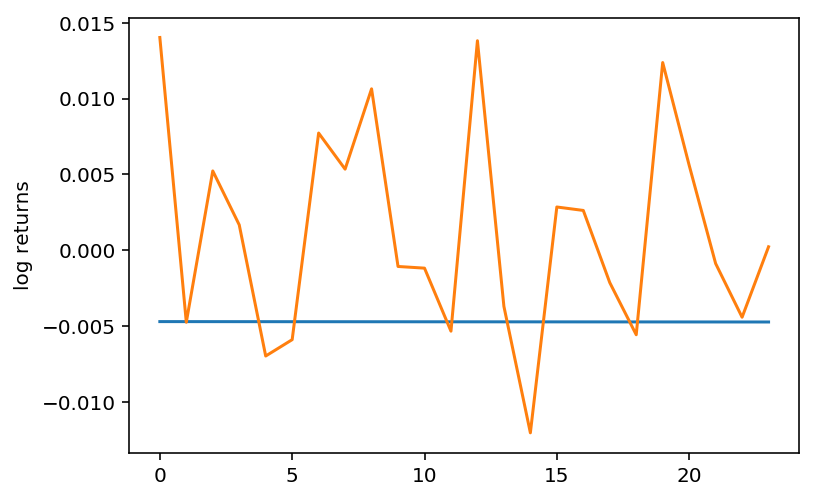

In [248]:
checkpoint = "checkpoints/model_2000_lr=0.01,rl=2,ru=256,kp=0.75.ckpt"
lstm_size_used = 256
num_layers_used = 2
num_prediction = 24

print(len(validation_set))

actual_log_returns = validation_set[-num_prediction:]
print(actual_log_returns)
print('actual_log_return count: {}'.format( len(actual_log_returns) ))

sample_length = 24*30 # Sample 30 days
thirty_days_sample = validation_set[-(sample_length+num_prediction):-num_prediction]
#print(thirty_days_sample)
print(len(thirty_days_sample))

samp = sample(checkpoint, num_prediction, lstm_size_used, num_layers_used, prime=thirty_days_sample)
print(samp)

plt.plot(samp)
plt.plot(actual_log_returns)

plt.ylabel('log returns')
plt.show()

INFO:tensorflow:Restoring parameters from checkpoints/model_2000_lr=0.01,rl=2,ru=256,kp=0.75.ckpt
[[-0.00044367]
 [-0.01325524]
 [ 0.00796599]
 [ 0.00017605]
 [-0.00025371]
 [ 0.00114441]
 [ 0.00090326]
 [ 0.00072395]
 [ 0.00064293]
 [ 0.00057736]
 [ 0.0005118 ]
 [ 0.00044756]
 [ 0.00038708]
 [ 0.00033358]
 [ 0.00028824]
 [ 0.00025211]
 [ 0.00022467]
 [ 0.00020589]
 [ 0.0001945 ]
 [ 0.0001894 ]
 [ 0.00019007]
 [ 0.00019525]
 [ 0.00020438]
 [ 0.00021663]]
[ -6.95458655e-04   3.47971327e-05   1.21785727e-04   6.95833696e-04
   2.99000435e-03  -1.28256235e-03   3.07169012e-03   1.40138408e-03
  -5.01027971e-03   9.72374156e-04  -3.46939130e-05   1.90823142e-03
  -8.48411393e-04   8.49131806e-04   1.73145182e-05   3.06461666e-03
  -8.63065956e-05  -2.15785113e-03   5.19004204e-05  -1.28014393e-03
   4.50356821e-04   6.57917518e-04   1.41878331e-03  -9.55342099e-04]


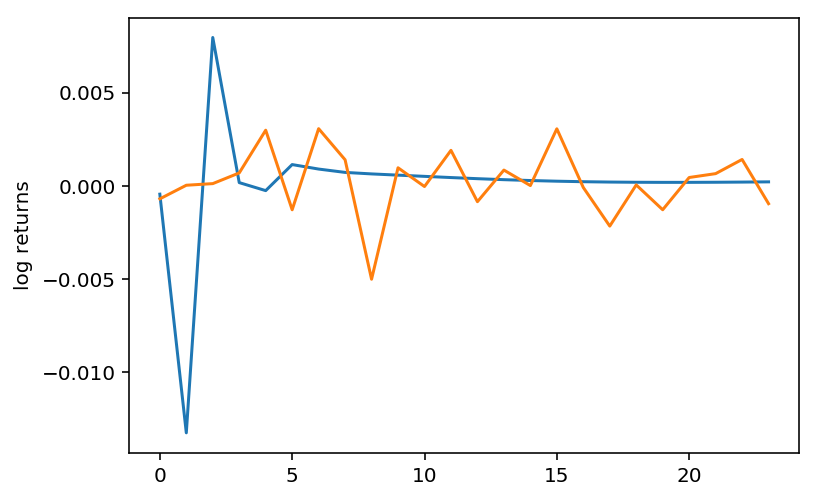

In [250]:
checkpoint = "checkpoints/model_2000_lr=0.01,rl=2,ru=256,kp=0.75.ckpt"
lstm_size_used = 256
num_layers_used = 2
num_prediction = 24
batches = get_batches(validation_set, 1, 24)
next(batches)
next(batches)
next(batches)
#next(batches)


vx, vy = next(batches)

model = NumSequenceRNN(batch_size=1, num_steps=24, lstm_size=lstm_size, num_layers=num_layers, 
                       learning_rate=1)
    
saver = tf.train.Saver()

with tf.Session() as sess:
    saver.restore(sess, checkpoint)
    v_feed = {model.inputs: vx, model.keep_prob: 1.0}
    prediction = sess.run(model.prediction, feed_dict = v_feed)
print(prediction)
print(vy[0])
plt.plot(prediction)
plt.plot(vy[0])

plt.ylabel('log returns')
plt.show()

In [214]:
# TODO: Write prediction code. Input a sequence of values and predict next day's closing return value
# TODO: 
# TODO: Calcurate moving average, macd etc and include it to the feature (Many to one RNN)

# TODO: Gradient clipping
# TODO: Use tensor board to plot these values
# TODO: Use hourly list instead of daily
# TODO: Setup Tensorboard for finding out the best hyperparams, optimizer, loss functions etc

# TODO: write tests